# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

## Load the Data

In [2]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [4]:
df.shape

(52000, 30)

In [5]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [6]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [7]:
df.isnull().sum()

Unnamed: 0                                        0
Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                              802
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                     537
Time                                              2
Local_Authority_(District)                        1
Local_Authority_(Highway)                         1
1st_Road_Class                                    1
1st_Road_Number                                   1
Road_Type                                         1
Speed_limit                                    1041
2nd_Road_Cla

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number     

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [12]:
df = df.drop('Date',axis=1)

null_columns = df.columns[df.isna().any()]
for i in null_columns:
    df[i] = df[i].fillna(df[i].mode()[0], inplace=True)

def remove_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for i in df.select_dtypes(exclude=['object']).columns:
    df = remove_outliers(df,i)


le = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = le.fit_transform(df[[i]])

ss = StandardScaler()
for i in df.select_dtypes(exclude=['object']).columns:
    print(i)
    df[i] = ss.fit_transform(df[[i]])


Unnamed: 0
Accident_Index
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
Latitude
Police_Force
Accident_Severity
Number_of_Vehicles
Number_of_Casualties
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
LSOA_of_Accident_Location
Year


C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15190 entries, 5 to 51990
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   15190 non-null  float64
 1   Accident_Index                               15190 non-null  float64
 2   Location_Easting_OSGR                        15190 non-null  float64
 3   Location_Northing_OSGR                       15190 non-null  float64
 4   Longitude                                    15190 non-null  float64
 5   Latitude                                     15190 non-null  float64
 6   Police_Force                                 15190 non-null  float64
 7   Accident_Severity                            15190 non-null  float64
 8   Number_of_Vehicles                           15190 non-null  float64
 9   Number_of_Casualties                         15190 non-null  float64
 10  Day

In [14]:
from sklearn.decomposition import PCA
X = pd.DataFrame(df).to_numpy()
Z = (X - X.mean()) / X.std()
pca = PCA(n_components=2)
pca_X = pca.fit_transform(Z)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

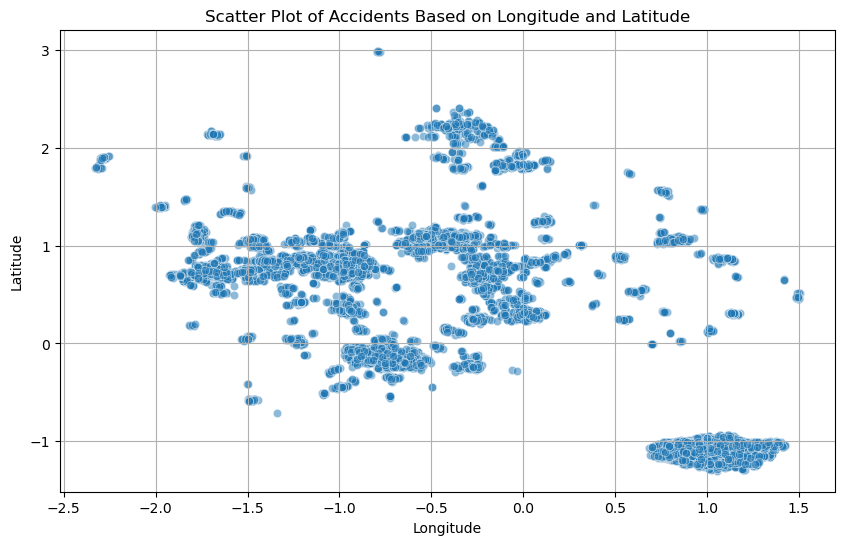

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [16]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(pca_X)
  wcss.append(kmeans.inertia_)

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CovidVa

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_X)


C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [18]:
from sklearn.metrics import silhouette_score
# Evaluate clustering results
silhouette_avg = silhouette_score(pca_X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7079003944139793


## Plot the data points with their predicted cluster center

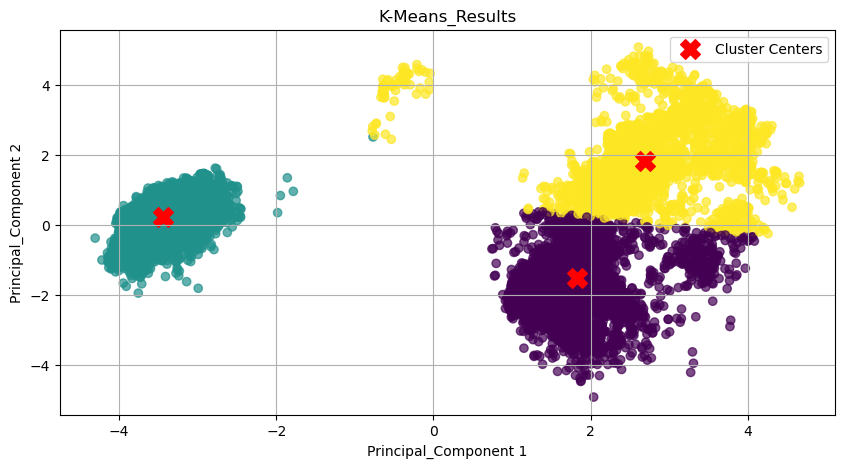

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means_Results')
plt.xlabel('Principal_Component 1')
plt.ylabel('Principal_Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
   - Accident Severity: Reflects the seriousness of the accident.
     Number of Vehicles: Differentiates between single and multi-vehicle accidents.
     Number of Casualties: Indicates the impact of the accident.
     Speed Limit: Influences accident likelihood and severity.
     Urban or Rural Area: Contextualizes the accident environment.
     These features directly relate to accident characteristics, making them relevant for clustering.
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   - Elbow Method: Used to identify the "elbow" point, suggesting the best number of clusters by balancing within-cluster variance.
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - Silhouette Score: Indicates how well data points fit within their clusters.
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   - A higher Silhouette Score means better-defined and distinct clusters, showing that the clustering approach is effective.
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
   - Future Work:
      Additional Features: Include weather or time of day for more nuanced clusters.
      Advanced Methods: Try DBSCAN or Hierarchical Clustering for potentially better results.
      Balance Data: Address any data imbalance to improve clustering accuracy.